# ✅  〰️  **Market Risk**  〰️  ✅ 
### Analítica de Finanzas📊 



## a)

In [302]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas_datareader.data as wb

In [212]:
df_2004 = pd.read_csv('./Adjusted.Prices.2004.csv')

In [213]:
df_2007 = pd.read_csv('./Adjusted.Prices.2007.csv')

In [214]:
df_2004

,Unnamed: 0,FTSE100,CAC40,DAX
0,2004-07-22,4306.299805,3572.840088,3801.050049
1,2004-07-23,4326.299805,3567.290039,3797.330078
2,2004-07-26,4287.000000,3532.610107,3752.590088
3,2004-07-27,4324.899902,3565.100098,3814.080078
4,2004-07-28,4356.299805,3575.919922,3807.209961
...,...,...,...,...
360,2005-12-08,5531.100098,4669.930176,5286.750000
361,2005-12-09,5517.399902,4661.009766,5282.129883
362,2005-12-12,5501.500000,4673.129883,5301.209961
363,2005-12-13,5507.200195,4693.399902,5310.279785


- Ordenamos el dataframe y le damos una fecha de indice

In [215]:
df = df_2004.rename(columns = {'Unnamed: 0':'Date'})
dfi = df.set_index('Date')
dfi

,FTSE100,CAC40,DAX
Date,,,
2004-07-22,4306.299805,3572.840088,3801.050049
2004-07-23,4326.299805,3567.290039,3797.330078
2004-07-26,4287.000000,3532.610107,3752.590088
2004-07-27,4324.899902,3565.100098,3814.080078
2004-07-28,4356.299805,3575.919922,3807.209961
...,...,...,...
2005-12-08,5531.100098,4669.930176,5286.750000
2005-12-09,5517.399902,4661.009766,5282.129883
2005-12-12,5501.500000,4673.129883,5301.209961


### Calculo del Retorno de la Inversión

#### Retanbilidad Lineal

In [216]:
def calcular_retornos(dfi):
    return dfi.pct_change()

In [217]:
retornos = calcular_retornos(dfi)
retornos.dropna()
retornos.sum()

FTSE100    0.254235
CAC40      0.278473
DAX        0.341559
dtype: float64

In [218]:
retornos

,FTSE100,CAC40,DAX
Date,,,
2004-07-22,NaN,NaN,NaN
2004-07-23,0.004644,-0.001553,-0.000979
2004-07-26,-0.009084,-0.009722,-0.011782
2004-07-27,0.008841,0.009197,0.016386
2004-07-28,0.007260,0.003035,-0.001801
...,...,...,...
2005-12-08,0.000416,0.002006,0.003797
2005-12-09,-0.002477,-0.001910,-0.000874
2005-12-12,-0.002882,0.002600,0.003612


### Rentabilidad Logaritmica

In [219]:
def retorno_log(dfi):
  return np.log(dfi) - np.log(dfi.shift(1))

In [220]:
log_retornos = retorno_log(dfi)
log_retornos.dropna()
log_retornos.sum()

FTSE100    0.231673
CAC40      0.268018
DAX        0.323559
dtype: float64

In [221]:
log_retornos.sum().mean()

0.27441645279685467

### Calculo de retornos medios logaritmicos

In [222]:
log_retono=np.log(dfi/dfi.shift(1))
log_retono

,FTSE100,CAC40,DAX
Date,,,
2004-07-22,NaN,NaN,NaN
2004-07-23,0.004634,-0.001555,-0.000979
2004-07-26,-0.009125,-0.009769,-0.011852
2004-07-27,0.008802,0.009155,0.016253
2004-07-28,0.007234,0.003030,-0.001803
...,...,...,...
2005-12-08,0.000416,0.002004,0.003790
2005-12-09,-0.002480,-0.001912,-0.000874
2005-12-12,-0.002886,0.002597,0.003606


In [223]:
log_retono.mean()*250

FTSE100    0.166432
CAC40      0.185608
DAX        0.226582
dtype: float64

In [224]:
log_retono.cov()*250

,FTSE100,CAC40,DAX
FTSE100,0.007925,0.008808,0.009058
CAC40,0.008808,0.013239,0.013467
DAX,0.009058,0.013467,0.016062


### Visualizacion de los precios

<AxesSubplot:xlabel='Date'>

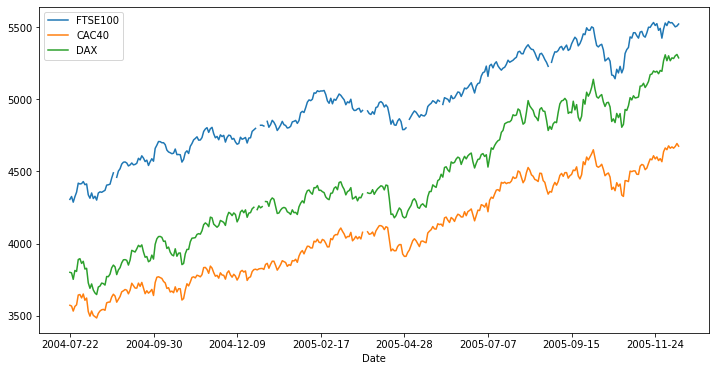

In [225]:
dfi.plot(figsize=(12,6))

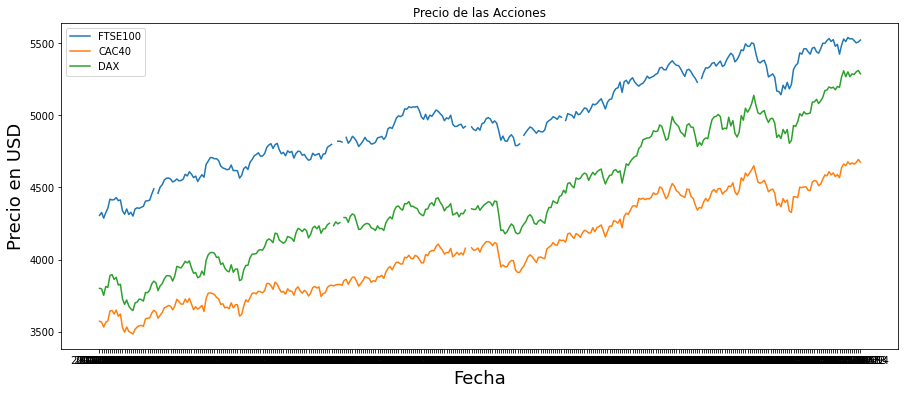

In [226]:
plt.figure(figsize=(15,6)) 

for i in dfi.columns.values: #Iteramos sobre el data frame y graficamos cada precio de las acciones
    
    plt.plot( dfi[i],  label=i)
plt.title('Precio de las Acciones')

plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(dfi.columns.values, loc='upper left') #Para descibir los elementos del grafico con simbologia

plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight') #Opcional: En caso de que queramos guardar la imagen para un posterior uso o analisis

plt.show()

# B)

### VaR

In [227]:
dfi.corr()

,FTSE100,CAC40,DAX
FTSE100,1.000000,0.983515,0.982655
CAC40,0.983515,1.000000,0.988154
DAX,0.982655,0.988154,1.000000


<AxesSubplot:>

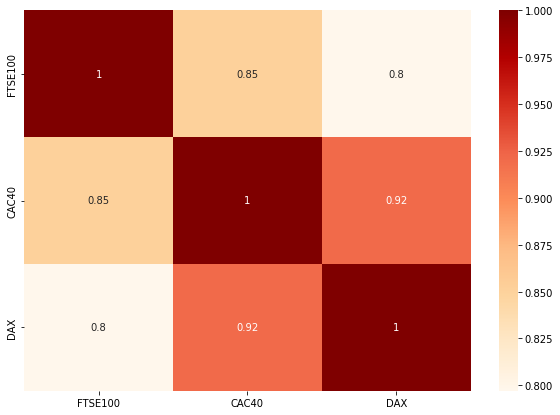

In [228]:
returns = dfi.pct_change() 
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(log_retono.corr(),annot=True,cmap='OrRd')

In [229]:
pesos = np.array([.33,.33,.33])  #Pesos iguales

In [230]:
portfolio_mean = returns.mean().dot(pesos)
portfolio_stdev = np.sqrt(pesos.T.dot(log_retono.cov()).dot(pesos))

### VaR con un nivel de confianza de 95% 

In [231]:
investment = int(1000)

mean_investment = (1+portfolio_mean) * investment
stdev_investment = investment * portfolio_stdev

conf_level = 0.05
cut = norm.ppf(conf_level, mean_investment, stdev_investment)

var_1d = investment - cut 

days = int(252)

print(("\nLa pérdida máxima de tu cartera inicial de " + str(investment) + 
    " usd con un nivel de confianza del " + str((1 - conf_level) * 100) + "% y para los siguientes " + str(days) + " días es de:\n"))

var_array = []

for i in range(1, days+1):
    var_array.append(np.round(var_1d * np.sqrt(i), 2))
    print("A " + str(i) + " días, VaR(" + str((1 - conf_level) * 100) + "%) = " + str(((np.round(var_1d * np.sqrt(i), 2))))+ "   Portfolio : " +str((np.round(investment * (1+portfolio_mean)**(i),2 ))))



La pérdida máxima de tu cartera inicial de 1000 usd con un nivel de confianza del 95.0% y para los siguientes 252 días es de:

A 1 días, VaR(95.0%) = 10.06   Portfolio : 1000.79
A 2 días, VaR(95.0%) = 14.22   Portfolio : 1001.59
A 3 días, VaR(95.0%) = 17.42   Portfolio : 1002.38
A 4 días, VaR(95.0%) = 20.12   Portfolio : 1003.17
A 5 días, VaR(95.0%) = 22.49   Portfolio : 1003.97
A 6 días, VaR(95.0%) = 24.64   Portfolio : 1004.77
A 7 días, VaR(95.0%) = 26.61   Portfolio : 1005.56
A 8 días, VaR(95.0%) = 28.45   Portfolio : 1006.36
A 9 días, VaR(95.0%) = 30.17   Portfolio : 1007.16
A 10 días, VaR(95.0%) = 31.8   Portfolio : 1007.95
A 11 días, VaR(95.0%) = 33.36   Portfolio : 1008.75
A 12 días, VaR(95.0%) = 34.84   Portfolio : 1009.55
A 13 días, VaR(95.0%) = 36.26   Portfolio : 1010.35
A 14 días, VaR(95.0%) = 37.63   Portfolio : 1011.15
A 15 días, VaR(95.0%) = 38.95   Portfolio : 1011.96
A 16 días, VaR(95.0%) = 40.23   Portfolio : 1012.76
A 17 días, VaR(95.0%) = 41.47   Portfolio : 1013.5

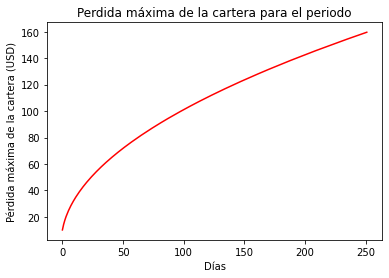

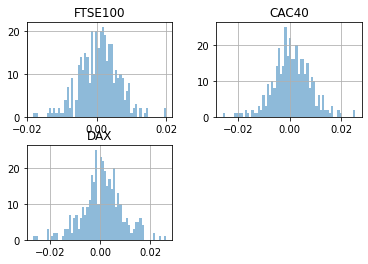

In [232]:
plt.xlabel("Días")
plt.ylabel("Pérdida máxima de la cartera (USD)")
plt.title("Perdida máxima de la cartera para el periodo")
plt.plot(var_array,"r")

returns.hist(bins=60,histtype="stepfilled",alpha=0.5)

plt.show()

### VaR con un nivel de confianza de 99%

In [233]:
investment = int(1000)

mean_investment = (1+portfolio_mean) * investment
stdev_investment = investment * portfolio_stdev

conf_level = 0.01
cut = norm.ppf(conf_level, mean_investment, stdev_investment)

var_1d = investment - cut 

days = int(252)

print(("\nLa pérdida máxima de tu cartera inicial de " + str(investment) + 
    " usd con un nivel de confianza del " + str((1 - conf_level) * 100) + "% y para los siguientes " + str(days) + " días es de:\n"))

var_array2 = []

for i in range(1, days+1):
    var_array2.append(np.round(var_1d * np.sqrt(i), 2))
    print("A " + str(i) + " días, VaR(" + str((1 - conf_level) * 100) + "%) = " + str(((np.round(var_1d * np.sqrt(i), 2))))+ "   Portfolio : " +str((np.round(investment * (1+portfolio_mean)**(i),2 ))))



La pérdida máxima de tu cartera inicial de 1000 usd con un nivel de confianza del 99.0% y para los siguientes 252 días es de:

A 1 días, VaR(99.0%) = 14.55   Portfolio : 1000.79
A 2 días, VaR(99.0%) = 20.58   Portfolio : 1001.59
A 3 días, VaR(99.0%) = 25.21   Portfolio : 1002.38
A 4 días, VaR(99.0%) = 29.11   Portfolio : 1003.17
A 5 días, VaR(99.0%) = 32.54   Portfolio : 1003.97
A 6 días, VaR(99.0%) = 35.65   Portfolio : 1004.77
A 7 días, VaR(99.0%) = 38.5   Portfolio : 1005.56
A 8 días, VaR(99.0%) = 41.16   Portfolio : 1006.36
A 9 días, VaR(99.0%) = 43.66   Portfolio : 1007.16
A 10 días, VaR(99.0%) = 46.02   Portfolio : 1007.95
A 11 días, VaR(99.0%) = 48.27   Portfolio : 1008.75
A 12 días, VaR(99.0%) = 50.41   Portfolio : 1009.55
A 13 días, VaR(99.0%) = 52.47   Portfolio : 1010.35
A 14 días, VaR(99.0%) = 54.45   Portfolio : 1011.15
A 15 días, VaR(99.0%) = 56.36   Portfolio : 1011.96
A 16 días, VaR(99.0%) = 58.21   Portfolio : 1012.76
A 17 días, VaR(99.0%) = 60.0   Portfolio : 1013.56

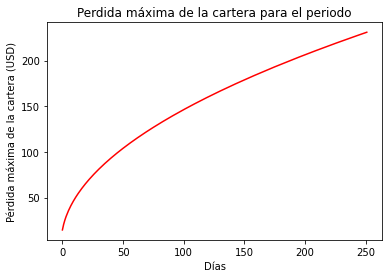

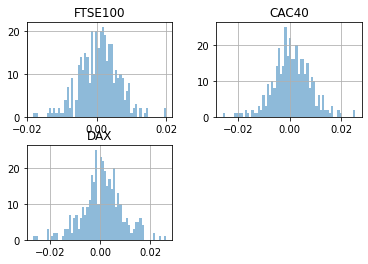

In [234]:
plt.xlabel("Días")
plt.ylabel("Pérdida máxima de la cartera (USD)")
plt.title("Perdida máxima de la cartera para el periodo")
plt.plot(var_array2,"r")

returns.hist(bins=60,histtype="stepfilled",alpha=0.5)

plt.show()

# C)

### Rendimientos de la cartera

In [235]:
np.sum(pesos*log_retono.mean())*250

0.19094502049306236

In [236]:
log_retono = log_retono.dropna()
log_retono

,FTSE100,CAC40,DAX
Date,,,
2004-07-23,0.004634,-0.001555,-0.000979
2004-07-26,-0.009125,-0.009769,-0.011852
2004-07-27,0.008802,0.009155,0.016253
2004-07-28,0.007234,0.003030,-0.001803
2004-07-29,0.014223,0.018802,0.021430
...,...,...,...
2005-12-08,0.000416,0.002004,0.003790
2005-12-09,-0.002480,-0.001912,-0.000874
2005-12-12,-0.002886,0.002597,0.003606


In [237]:
varianza = np.dot(pesos.T,np.dot(log_retono.cov()*250,pesos))
varianza

0.010986949778450036

In [238]:
volatilidad = np.sqrt(varianza)
volatilidad

0.10481865186334938

In [239]:
retornos_portfolio = []
volatilidades_portoflio = [] 
retornos_portfolio.append(np.sum(pesos*log_retono.mean())*250)
volatilidades_portoflio.append(np.sqrt(np.dot(pesos.T,np.dot(log_retono.cov()*250,pesos))))

In [240]:
retornos_portfolio=np.array(retornos_portfolio)

In [241]:
volatilidades_portoflio=np.array(volatilidades_portoflio)

In [242]:
porfolios = pd.DataFrame({'Retorno':retornos_portfolio,'Volatilidad':volatilidades_portoflio})

In [243]:
inversion = 1000

In [375]:
porfolios['Retorno inversion'] = porfolios['Retorno'] * inversion

In [376]:
porfolios['Saldo final '] = porfolios['Retorno'] * inversion + inversion

In [377]:
porfolios

,Retorno,Volatilidad,Retorno inversion,Saldo final
0,0.193021,0.104819,193.020547,1193.020547


- Retornos diarios de la cartera con los 3 indices

In [246]:
log_retono

,FTSE100,CAC40,DAX
Date,,,
2004-07-23,0.004634,-0.001555,-0.000979
2004-07-26,-0.009125,-0.009769,-0.011852
2004-07-27,0.008802,0.009155,0.016253
2004-07-28,0.007234,0.003030,-0.001803
2004-07-29,0.014223,0.018802,0.021430
...,...,...,...
2005-12-08,0.000416,0.002004,0.003790
2005-12-09,-0.002480,-0.001912,-0.000874
2005-12-12,-0.002886,0.002597,0.003606


In [247]:
retorno_portafolio = log_retono.dot(pesos)

In [248]:
retorno_portafolio

Date
2004-07-23    0.000693
2004-07-26   -0.010146
2004-07-27    0.011289
2004-07-28    0.002792
2004-07-29    0.017970
                ...   
2005-12-08    0.002049
2005-12-09   -0.001738
2005-12-12    0.001095
2005-12-13    0.002334
2005-12-14   -0.001940
Length: 346, dtype: float64

In [249]:
dfi['Retorno diario'] = retorno_portafolio

In [250]:
dfi['Saldo'] = retorno_portafolio * inversion + inversion

In [251]:
dfi.dropna()driv

,FTSE100,CAC40,DAX,Retorno diario,Saldo
Date,,,,,
2004-07-23,4326.299805,3567.290039,3797.330078,0.000693,1000.692951
2004-07-26,4287.000000,3532.610107,3752.590088,-0.010146,989.853633
2004-07-27,4324.899902,3565.100098,3814.080078,0.011289,1011.289348
2004-07-28,4356.299805,3575.919922,3807.209961,0.002792,1002.792291
2004-07-29,4418.700195,3643.790039,3889.679932,0.017970,1017.970049
...,...,...,...,...,...
2005-12-08,5531.100098,4669.930176,5286.750000,0.002049,1002.049427
2005-12-09,5517.399902,4661.009766,5282.129883,-0.001738,998.262119
2005-12-12,5501.500000,4673.129883,5301.209961,0.001095,1001.094510


**Observacion**: El análisis de rentabilidades que hemos estado haciendo y que calculamos es un rendimiento que toma en cuenta solamente los precios históricos. ¿Que quiere decir eso, que la rentabilidad real del banco no fue exactamente la que se muestra en el dataframe, porque se debe esto? 

Porque rendimiento total es el ingreso total obtenido a partir de una inversión, incluidas las ganancias de capital, durante un período de tiempo dado. El rendimiento total, también conocido como rendimiento anualizado, es importante para los inversores. Su cálculo permite realizar un seguimiento preciso y eficiente del 100% del rendimiento de su inversión. El precio de las acciones/fondos por sí solo no da una imagen completa de cómo se está comportando esa acción. Al agregar otras métricas clave, como dividendos, repartos y ganancias de capital, se obtiene una imagen más completa del valor de la inversión en acciones.

Por tanto, al rendimiento total de la inversión para que sea real debemos agregarle:

- Dividendos recibidos en caso de que existan
- Inflación la cual se restara al rendimiento total
- Costos de inversión
- Entre otros, pueden existir en toros tipos de inversiones, Intereses, Plusvalías, repartos, renta, etc.

Ejemplo: Si la rentabilidad hubiese sido 5% de la cartera hubiésemos tenido perdida debido a que la inflación por ejemplo de USA es de 8.2%, por tanto, en ese caso podríamos decir que junto con la inflación tendríamos una rentabilidad real de la cartera del banco.


# D)

### VaR Simulacion historica

- Para obtener el VaR al 95% de confianza, primero obtenemos los retornos históricos de la serie y luego se debe calcular el percentil 5% sobre la serie de retornos históricos.

In [266]:
dfi

,FTSE100,CAC40,DAX,Retorno diario,Saldo
Date,,,,,
2004-07-22,4306.299805,3572.840088,3801.050049,NaN,NaN
2004-07-23,4326.299805,3567.290039,3797.330078,0.000693,1000.692951
2004-07-26,4287.000000,3532.610107,3752.590088,-0.010146,989.853633
2004-07-27,4324.899902,3565.100098,3814.080078,0.011289,1011.289348
2004-07-28,4356.299805,3575.919922,3807.209961,0.002792,1002.792291
...,...,...,...,...,...
2005-12-08,5531.100098,4669.930176,5286.750000,0.002049,1002.049427
2005-12-09,5517.399902,4661.009766,5282.129883,-0.001738,998.262119
2005-12-12,5501.500000,4673.129883,5301.209961,0.001095,1001.094510


In [297]:
dfinal = dfi.to_csv('cuantiles.csv') #podemos exportar para posterior uso o corroboracion en excel u otros.

In [298]:
dfi['Retorno diario'].describe()

count    346.000000
mean       0.000772
std        0.006629
min       -0.023248
25%       -0.003037
50%        0.000938
75%        0.004973
max        0.022916
Name: Retorno diario, dtype: float64

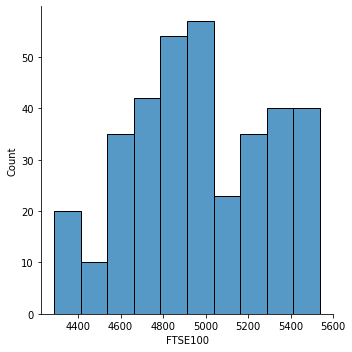

In [304]:
sns.displot(dfi['FTSE100'])

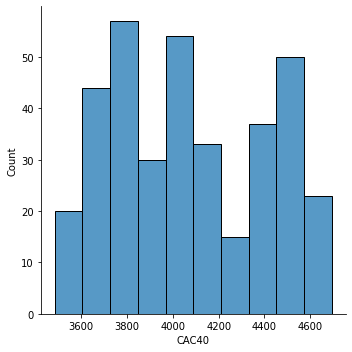

In [305]:
sns.displot(dfi['CAC40'])

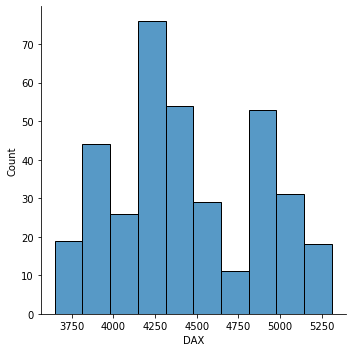

In [306]:
sns.displot(dfi['DAX'])

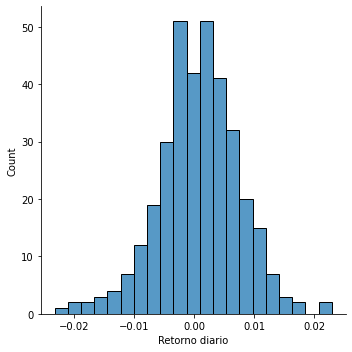

In [307]:
sns.displot(dfi['Retorno diario'])

- ## VaR al 95% de confianza

In [361]:
per1 = dfi['Retorno diario'].quantile(0.05)

print('El var de la cartera con un nivel de confianza del 95% es ' + str (per1) + '%')

El var de la cartera con un nivel de confianza del 95% es -0.01014355377304226%


- Opcion 2) Calculo Var y multiplico por la cantidad invertida

In [362]:
def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=392):
    
    returns = returns.fillna(0.0)
    
    # Multiplique la rentabilidad de los activos por las ponderaciones para obtener una rentabilidad ponderada de la cartera
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    # Calcule la pérdida percentil correcta y multiplíquela por el valor invertido
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [363]:
value_at_risk(1000,log_retono,pesos,0.95,392)

-10.14355377304226

- Calculo y vizualizacion

In [366]:
value_invested = 1000

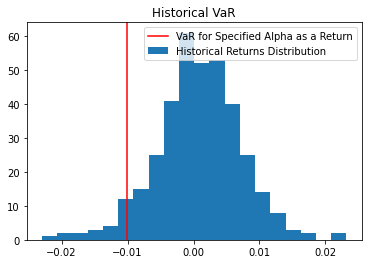

In [367]:
lookback_days = 392
alpha = 0.95

# Multiplique los rendimientos de los activos por las ponderaciones para obtener un rendimiento ponderado de la cartera.
portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(pesos)

portfolio_VaR = value_at_risk(value_invested, returns, pesos, alpha=0.95)
# Necesidad de expresarlo como rendimiento en lugar de pérdida absoluta.
portfolio_VaR_return = portfolio_VaR / value_invested

plt.hist(portfolio_returns.values, bins=20)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.legend(['VaR for Specified Alpha as a Return', 'Historical Returns Distribution'])
plt.title('Historical VaR');

- ### VaR al 99% de confianza

In [368]:
per2 = dfi['Retorno diario'].quantile(0.01)

print('El var de la cartera con un nivel de confianza del 99% es ' + str (per2) + '%')

El var de la cartera con un nivel de confianza del 99% es -0.01721736421955753%


- Opcion 2) Calculo Var y multiplico por la cantidad invertida

In [369]:
def value_at_risk(value_invested, returns, weights, alpha=0.99, lookback_days=392):
    
    returns = returns.fillna(0.0)
    
    # Multiplique la rentabilidad de los activos por las ponderaciones para obtener una rentabilidad ponderada de la cartera
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    # Calcule la pérdida percentil correcta y multiplíquela por el valor invertido
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [370]:
value_at_risk(1000,log_retono,pesos,0.99,392)

-17.217364219557528

- Calculo y vizualizacion

In [373]:
value_invested = 1000

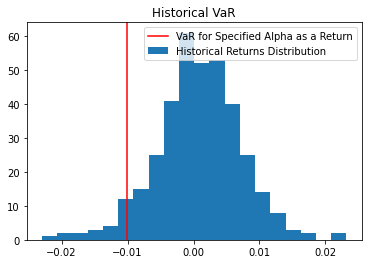

In [374]:
lookback_days = 392
alpha = 0.99

# Multiplique los rendimientos de los activos por las ponderaciones para obtener un rendimiento ponderado de la cartera.
portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(pesos)

portfolio_VaR = value_at_risk(value_invested, returns, pesos, alpha=0.95)
# Necesidad de expresarlo como rendimiento en lugar de pérdida absoluta.
portfolio_VaR_return = portfolio_VaR / value_invested

plt.hist(portfolio_returns.values, bins=20)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.legend(['VaR for Specified Alpha as a Return', 'Historical Returns Distribution'])
plt.title('Historical VaR');

- Fotos de simbologia resultados VaR

<img src="dist.png">

<img src="dist2.png">

# e)

### ES -----> Expected Shortfall / VaR Condicional

- "Que tan mal pueden ponerse las cosas", cual seria en se caso la perdida esperada.

<img src="IMG_1788.jpg">

In [382]:
def cvar(value_invested, returns, pesos, alpha=0.95, lookback_days=392):
   # Calculemos el CVaR con nuestros datos y veamos cómo se compara con el VaR
    var = value_at_risk(value_invested, returns, pesos, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(pesos)
    
   # Volver a un retorno en lugar de una pérdida absoluta
    var_pct_loss = var / value_invested
    
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

- Calculemos el CVaR con nuestros datos y veamos cómo se compara con el VaR.

In [385]:
cvar(value_invested, returns, pesos, lookback_days=392) # 392 dias

-13.919635660122296

In [386]:
value_at_risk(value_invested, returns, pesos, lookback_days= 392)

-16.917170241784614

- El CVaR  capta más información sobre la forma de la distribución, es decir, los momentos de la distribución. Si las colas tienen más masa, esto lo captará. En general, se considera una métrica muy superior a la del VaR y, en la mayoría de los casos, debería utilizarse antes que ésta.

# f)

- Comparamos los valores obtenidos para el VaR con el método de simulación histórica  y los obtenidos con el método de varianza-covarianza 

1. VaR Analítica / Paramétrica: Utiliza información histórica para calcular volatilidades y correlaciones de las variables de mercado que se aplican al valor actual de la cartera con un modelo de cálculo estadístico, asumiendo la forma de la función de distribución de los rendimientos de los activos como una normal.
2. VaR Simulación Histórica: En lugar de utilizar la información histórica para calcular volatilidades y correlaciones de los activos de la cartera, se estudian las pérdidas y ganancias que habría experimentado la cartera actual si se hubieran producido, aleatoriamente, las rentabilidades históricas del conjunto de activos que definen los nodos de riesgo estándar. Una vez obtenidas las pérdidas y ganancias hipotéticas para cada día del periodo de observación, se puede generar una distribución de rentabilidades esperadas y tomar los percentiles de dicha distribución como medida directa del VaR. Al contrario que la metodología paramétrica, no asume ninguna forma de la función de distribución de los rendimientos de los activos.

En general, la Metodología Analítica se va a recomendar cuando la cartera no contenga posiciones en derivados de consideración y se va a desaconsejar cuando la cartera contenga posiciones de consideración en instrumentos no lineales y las distribuciones de las rentabilidades no sean normales.
La Simulación Histórica es recomendable cuando el pasado reciente sea representativo del riesgo presente en la cartera y cuando tengamos posiciones no lineales de consideración en la cartera. Por el contrario, se va a desaconsejar cuando el pasado reciente no sea representativo del futuro.

Por tanto, en este caso podríamos decir que el Var paramétrico puede ser una fuente de información para calcular las posibles pérdidas de nuestro portafolio y generar simulaciones a futuro, al igual y diversos cálculos para poder optimizar de mejor manera y rentabilizar nuestro portafolio y estar preparados ante posibles escenarios que pueden afectar de manera drástica.
 
 

